# Convolutional Neural Networks

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image as im1
from matplotlib import image as im2
import matplotlib.pyplot as plt
import pickle

### Data preprocessing

In [51]:
train_datagen = ImageDataGenerator( 
rescale = 1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
'Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set',
target_size=(64,64), # could be bigger, but we will use this so training set updates faster
batch_size=32,
class_mode='binary')
#help(ImageDataGenerator()) 

Found 8000 images belonging to 2 classes.


In [52]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'Section 40 - Convolutional Neural Networks (CNN)/dataset/test_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


### Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Convolution

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu', input_shape=[64,64,3]))
#Filters is the numbers of features we want to detect, first argument
#Kernel size is the second argument, size 3 we will use, will use a 3-3 feature detector
#Activation will be a rectifier 
#input shape will be 64, 64, 3 since we reshaped. If it was black and white it would be 1 instead of 3

### Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#We will apply max pooling
#Pool size parameter is the size of the frame we are using to construct a pooled feature map
#Strides is the frame moving

### Adding a second layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#This will be added to the flattened layer
#Units will be 128, this is the amount of neurons

### Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#Sigmoid since it is a binary classification, softmax for categorical 

### Compiling the CNN

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
250/250 [==============================] - 44s 173ms/step - loss: 0.6510 - accuracy: 0.6165 - val_loss: 0.6463 - val_accuracy: 0.6340
Epoch 2/30
250/250 [==============================] - 32s 126ms/step - loss: 0.5789 - accuracy: 0.6923 - val_loss: 0.5663 - val_accuracy: 0.7090
Epoch 3/30
250/250 [==============================] - ETA: 0s - loss: 0.5498 - accuracy: 0.7174

### This model takes a long time to train, I will saved the trained model

In [12]:
with open("cnn.pickle","wb") as f:
    pickle.dump(cnn,f)

INFO:tensorflow:Assets written to: ram://d465b3a8-16a1-4179-808d-8ccef964e809/assets


INFO:tensorflow:Assets written to: ram://d465b3a8-16a1-4179-808d-8ccef964e809/assets


In [13]:
with open("cnn.pickle", "rb") as f:
    cnn_model = pickle.load(f)

In [14]:
cnn_model

### Lets Test this model on pictures

### Test 1: Dog

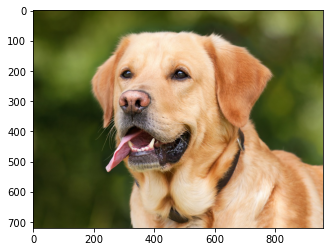

In [23]:
view = im2.imread('Section 40 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_1.jpg')
plt.imshow(view)

### Now lets see if our model can predict this is a dog

In [24]:
image = tf.keras.preprocessing.image.load_img('Section 40 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn_model.predict(input_arr/255.0)
if(predictions < .5):
    print('This is a Dog, WOOF')
else: 
    print('This is a cat, MEOW')

1/1 [==============================] - 0s 22ms/step
This is a Dog, WOOF


### Test 2: Cat

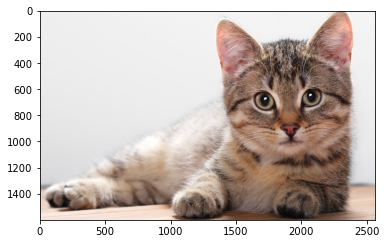

In [25]:
view = im2.imread('Section 40 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_2.jpg')
plt.imshow(view)

In [26]:
image = tf.keras.preprocessing.image.load_img('Section 40 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr/255.0)
if(predictions[0][0] < .5):
    print('This is a Dog, WOOF')
else: 
    print('This is a cat, MEOW')

1/1 [==============================] - 0s 20ms/step
This is a cat, MEOW


### Test 3: Cat

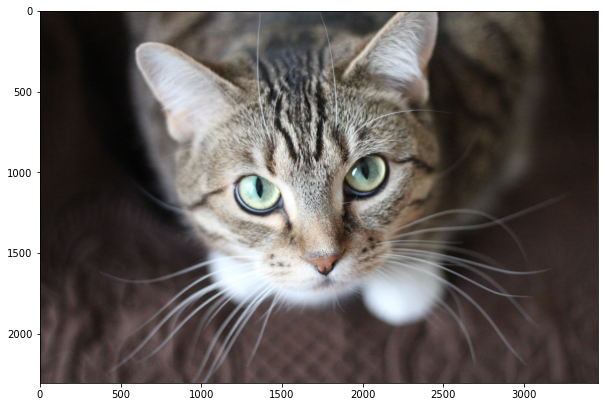

In [27]:
view = im2.imread('cat.jpg')
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(view)

In [28]:
image = tf.keras.preprocessing.image.load_img('cat.jpg', target_size = (64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr/255.0)
if(predictions[0][0] < .5):
    print('This is a Dog, WOOF')
else: 
    print('This is a cat, MEOW')

1/1 [==============================] - 0s 20ms/step
This is a cat, MEOW


### Test 4:Dog

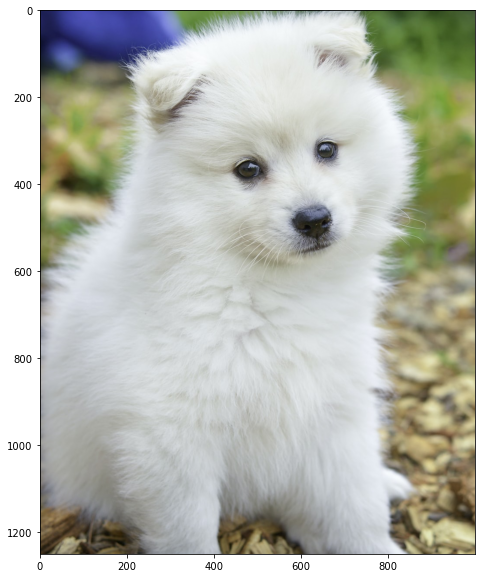

In [29]:
view = im2.imread('dog.jpg')
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(view)

In [30]:
image = tf.keras.preprocessing.image.load_img('dog.jpg', target_size = (64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr/255.0)
if(predictions[0][0] < .5):
    print('This is a Dog, WOOF')
else: 
    print('This is a cat, MEOW')

1/1 [==============================] - 0s 19ms/step
This is a Dog, WOOF
